In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Importing the training set.

dataset_train=pd.read_csv('Google_Stock_Price_Train.csv')
dataset_train.head(2)

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"


In [3]:
# Finding training set on which our input RNN will be trained.

training_set=dataset_train.iloc[:,1:2].values





In [4]:
# Feature Scaling

from sklearn.preprocessing import MinMaxScaler
sc=MinMaxScaler(feature_range=(0,1))
training_set_scaled=sc.fit_transform(training_set)

In [5]:
# Creating data structure with 60 timesteps and 1 output.
# Taking 60 time steps means at every time rnn will look at 60 stock prices before time t and after looking it will predict the next.
# Using above it will predict one output at time t+1.

x_train=[]
y_train=[]

for i in range(60,1258):
    X_train = []
y_train = []
for i in range(60, 1258):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
    

X_train,y_train=np.array(X_train),np.array(y_train)

    



In [6]:
X_train

array([[0.08581368, 0.09701243, 0.09433366, ..., 0.07846566, 0.08034452,
        0.08497656],
       [0.09701243, 0.09433366, 0.09156187, ..., 0.08034452, 0.08497656,
        0.08627874],
       [0.09433366, 0.09156187, 0.07984225, ..., 0.08497656, 0.08627874,
        0.08471612],
       ...,
       [0.92106928, 0.92438053, 0.93048218, ..., 0.95475854, 0.95204256,
        0.95163331],
       [0.92438053, 0.93048218, 0.9299055 , ..., 0.95204256, 0.95163331,
        0.95725128],
       [0.93048218, 0.9299055 , 0.93113327, ..., 0.95163331, 0.95725128,
        0.93796041]])

In [7]:
# Reshaping
# To add a new dimension in numpy array using reshape.

X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))


In [8]:
X_train.shape

(1198, 60, 1)

In [9]:
# Building and Training RNN.

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

Using TensorFlow backend.


In [10]:
# Regressor is object of sequential class and represents sequence of layers.
# We have used regressor here  as we are predicting the continous values.

regressor=Sequential()

In [11]:
# Building the RNN.(Adding first layer and some dropout regularization.)
# Units parameter means no. of neurons you want to have in first LSTM layer.
# We want high dimensionality model that's why we take number of units or neurons in first sequence layer as 50.
# Since we will be adding more sequential layer that's why we take return_sequences =True
# input_shape basically represents the last two dimensions of dataset and an indicator or predictor.

regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

In [12]:
# Adding second, third and fourth LSTM layers.

regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

In [13]:
# Adding the output layer.

regressor.add(Dense(units = 1))

In [14]:
# Compiling RNN 

regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [15]:
# Fitting the RNN to the training set.

regressor.fit(X_train,y_train,epochs=100,batch_size=32)

Epoch 1/100
1198/1198 [==============================] - 22s 18ms/step - loss: 0.0409
Epoch 2/100
1198/1198 [==============================] - 11s 9ms/step - loss: 0.0060
Epoch 3/100
1198/1198 [==============================] - 11s 9ms/step - loss: 0.0051
Epoch 4/100
1198/1198 [==============================] - 12s 10ms/step - loss: 0.0048
Epoch 5/100
1198/1198 [==============================] - 16s 14ms/step - loss: 0.0048
Epoch 6/100
1198/1198 [==============================] - 17s 14ms/step - loss: 0.0046
Epoch 7/100
1198/1198 [==============================] - 15s 13ms/step - loss: 0.0048
Epoch 8/100
1198/1198 [==============================] - 16s 13ms/step - loss: 0.0048
Epoch 9/100
1198/1198 [==============================] - 15s 13ms/step - loss: 0.0049
Epoch 10/100
1198/1198 [==============================] - 14s 12ms/step - loss: 0.0045
Epoch 11/100
1198/1198 [==============================] - 16s 13ms/step - loss: 0.0042
Epoch 12/100
1198/1198 [==============================

1198/1198 [==============================] - 11s 10ms/step - loss: 0.0017
Epoch 96/100
1198/1198 [==============================] - 12s 10ms/step - loss: 0.0015
Epoch 97/100
1198/1198 [==============================] - 12s 10ms/step - loss: 0.0014
Epoch 98/100
1198/1198 [==============================] - 12s 10ms/step - loss: 0.0014
Epoch 99/100
1198/1198 [==============================] - 11s 9ms/step - loss: 0.0016
Epoch 100/100
1198/1198 [==============================] - 11s 9ms/step - loss: 0.0015


In [16]:
# Making predictions and visualizing the results.
# Getting real stock prices of google.
dataset_test = pd.read_csv('Google_Stock_Price_Test.csv')
real_stock_price = dataset_test.iloc[:, 1:2].values

In [18]:
real_stock_price

array([[778.81],
       [788.36],
       [786.08],
       [795.26],
       [806.4 ],
       [807.86],
       [805.  ],
       [807.14],
       [807.48],
       [807.08],
       [805.81],
       [805.12],
       [806.91],
       [807.25],
       [822.3 ],
       [829.62],
       [837.81],
       [834.71],
       [814.66],
       [796.86]])

In [19]:
# Getting predicted stock price in january 2017.
# We will need stock price from fist financial day of 2017 -60 and upper bound will be the last stock price of dataset_total
# len(dataset_total) will be the index of last day of jan 2017 and len(dataset_test) is 20 subtracting these two we will get 3 jan 2017
# and that is the date we need.

dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 80):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)


In [20]:
predicted_stock_price

array([[791.01874],
       [788.436  ],
       [788.2265 ],
       [789.04913],
       [791.74945],
       [796.91266],
       [802.04944],
       [804.72876],
       [805.7183 ],
       [805.8879 ],
       [805.7487 ],
       [805.4204 ],
       [805.10834],
       [805.4283 ],
       [806.2112 ],
       [810.2187 ],
       [816.45496],
       [823.50525],
       [827.95886],
       [825.3955 ]], dtype=float32)

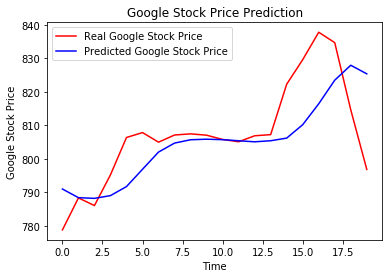

In [21]:
#  Visualizing the results.

plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()